In [5]:
#Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip uninstall -y serial
!{sys.executable} -m pip install pyserial 
!{sys.executable} -m pip install scipy

   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   - -------------------------------------- 1.6/40.9 MB 10.5 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/40.9 MB 19.7 MB/s eta 0:00:02
   ------------ --------------------------- 13.1/40.9 MB 22.2 MB/s eta 0:00:02
   ----------------- ---------------------- 17.8/40.9 MB 22.5 MB/s eta 0:00:02
   --------------------- ------------------ 22.3/40.9 MB 22.7 MB/s eta 0:00:01
   -------------------------- ------------- 27.5/40.9 MB 23.3 MB/s eta 0:00:01
   ------------------------------ --------- 31.2/40.9 MB 22.3 MB/s eta 0:00:01
   ----------------------------------- ---- 36.7/40.9 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 17.4 M

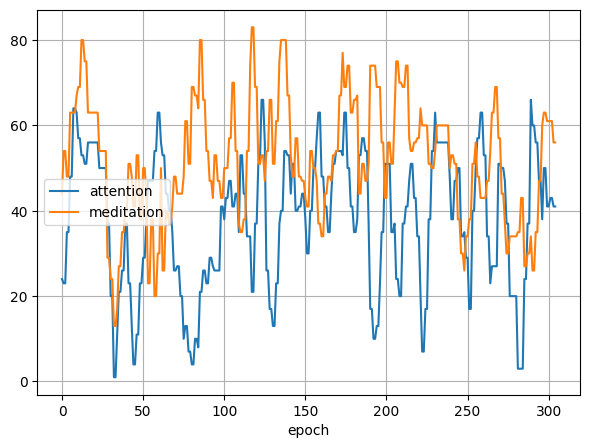

KeyboardInterrupt: 

In [2]:
import mindwave, time
import pylab as pl
from IPython import display
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
%matplotlib inline


def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();


headset = mindwave.Headset('com3')
time.sleep(2)

data = collections.defaultdict(list)
while True:
    # Meditation, Attention, delta, theta, low-alpha, high-alpha, low-beta, high-beta, low-gamma, mid-gamma
    data['attention'].append(headset.attention)
    data['meditation'].append(headset.meditation)
#    data['delta'].append(headset.waves['delta'])
#    data['theta'].append(headset.waves['theta'])
#    data['low-alpha'].append(headset.waves['low-alpha'])
#    data['high-alpha'].append(headset.waves['high-alpha'])
#    data['low-beta'].append(headset.waves['low-beta'])
#    data['high-beta'].append(headset.waves['high-beta'])
#    data['low-gamma'].append(headset.waves['low-gamma'])
#    data['mid-gamma'].append(headset.waves['mid-gamma'])
    live_plot(data)
    time.sleep(0.5)
    
#while True:
#    print ("Raw value: %s, Attention: %s, Meditation: %s" % (headset.raw_value, headset.attention, headset.meditation))
#    print ("Waves: {}".format(headset.waves))

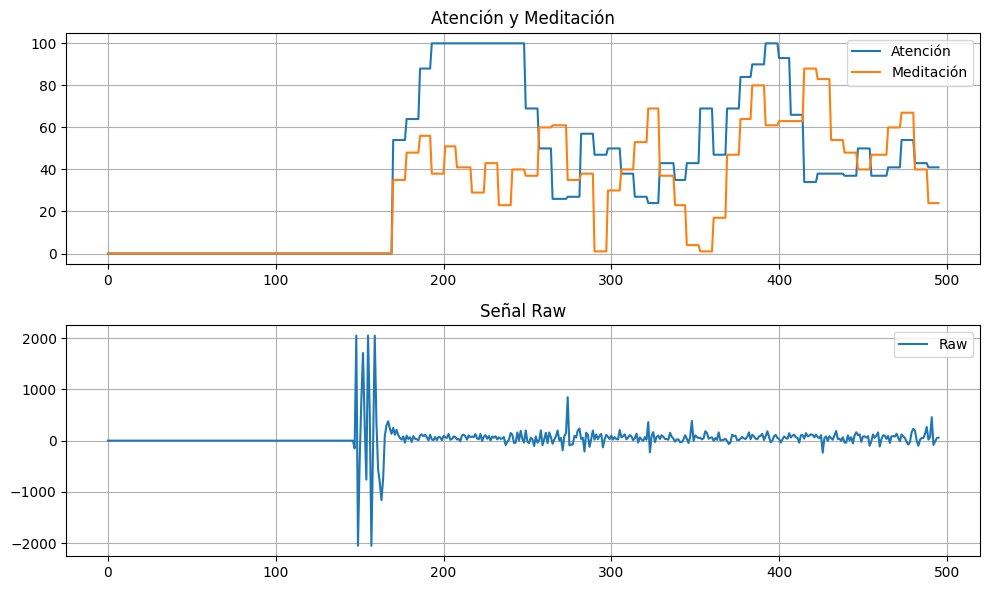

AttributeError: 'Headset' object has no attribute 'disconnect'

Closing connection...


In [6]:
import mindwave
import time
import collections
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np

def live_plot(data_dict, figsize=(10,6), title='Señales EEG en Tiempo Real'):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    # Crear subplots para diferentes señales
    plt.subplot(2, 1, 1)
    plt.plot(data_dict['attention'], label='Atención')
    plt.plot(data_dict['meditation'], label='Meditación')
    plt.title('Atención y Meditación')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(data_dict['raw'], label='Raw')
    plt.title('Señal Raw')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def real_time_eeg_capture(duration=60, sampling_rate=512):
    # Configuración de conexión
    headset = mindwave.Headset('COM3')
    time.sleep(2)  # Tiempo de estabilización

    # Inicialización de datos
    data = {
        'attention': [],
        'meditation': [],
        'raw': [],
        'delta': [],
        'theta': [],
        'low_alpha': [],
        'high_alpha': [],
        'low_beta': [],
        'high_beta': [],
        'low_gamma': [],
        'mid_gamma': []
    }

    # Cálculo de intervalo de muestreo
    sampling_interval = 1 / sampling_rate

    # Tiempo de inicio
    start_time = time.time()
    
    try:
        while time.time() - start_time < duration:
            # Captura de datos
            data['attention'].append(headset.attention)
            data['meditation'].append(headset.meditation)
            data['raw'].append(headset.raw_value)
            
            # Descomentar para capturar ondas cerebrales
            try:
                data['delta'].append(headset.waves['delta'])
                data['theta'].append(headset.waves['theta'])
                data['low_alpha'].append(headset.waves['low-alpha'])
                data['high_alpha'].append(headset.waves['high-alpha'])
                data['low_beta'].append(headset.waves['low-beta'])
                data['high_beta'].append(headset.waves['high-beta'])
                data['low_gamma'].append(headset.waves['low-gamma'])
                data['mid_gamma'].append(headset.waves['mid-gamma'])
            except:
                # Manejar casos donde no se puedan capturar todas las ondas
                pass

            # Visualización
            live_plot(data)

            # Control de intervalo de muestreo
            time.sleep(sampling_interval)

    except KeyboardInterrupt:
        print("Captura de datos detenida por el usuario")
    
    finally:
        # Cerrar conexión
        headset.disconnect()
        
        # Información de captura
        print(f"Muestras capturadas:")
        for key, value in data.items():
            print(f"{key}: {len(value)} muestras")

# Ejecutar captura
real_time_eeg_capture(duration=60, sampling_rate=512)

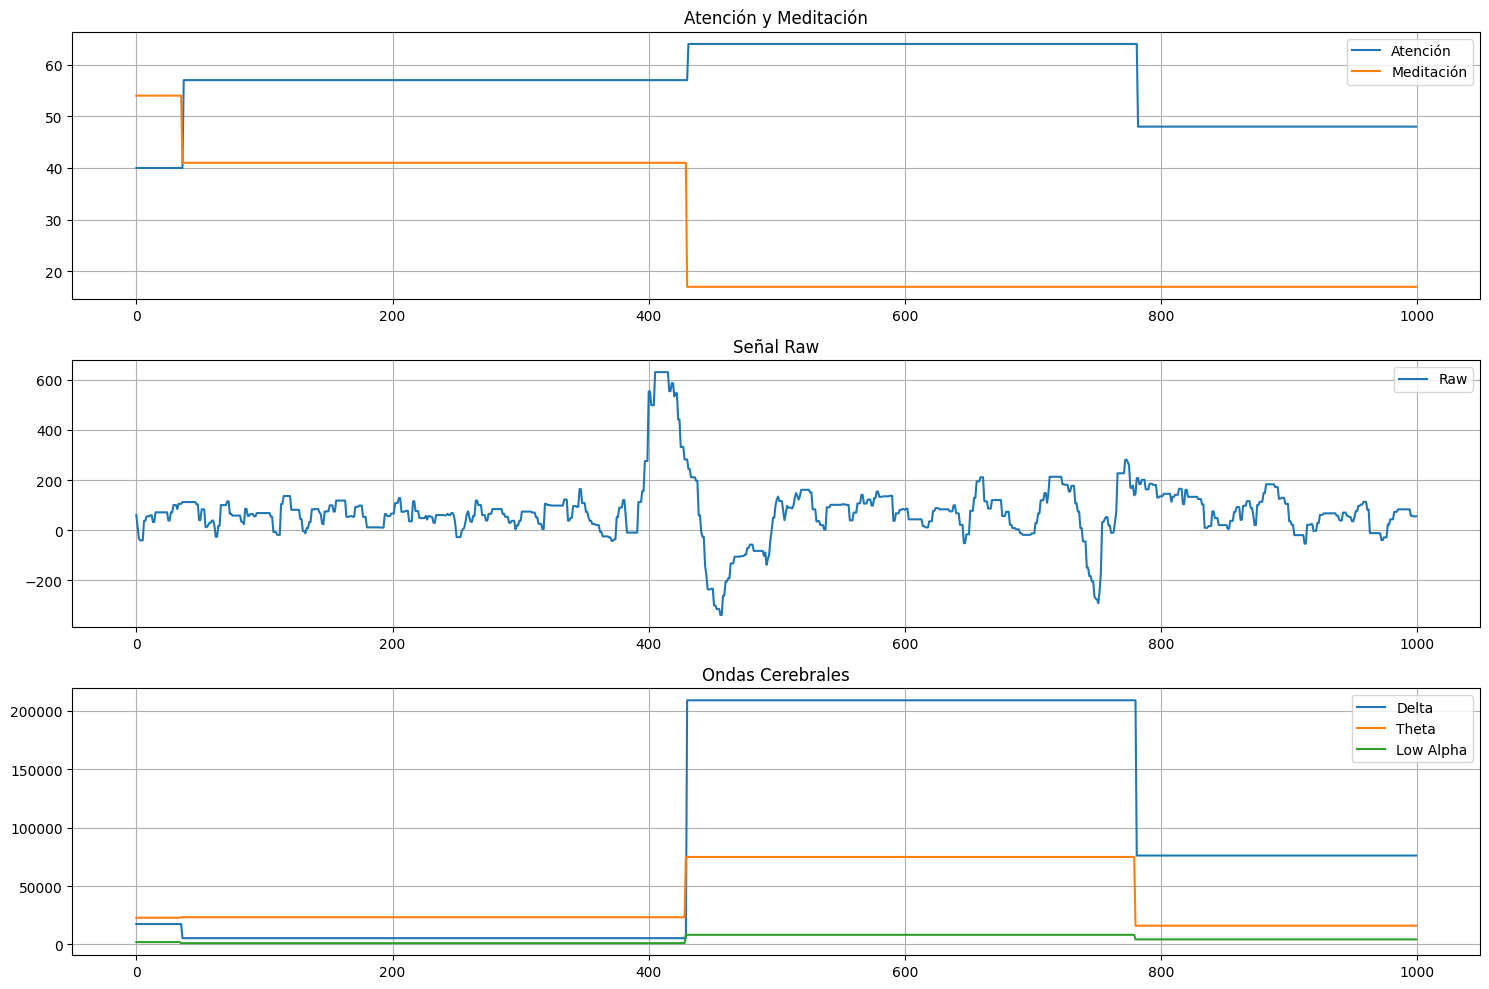

AttributeError: 'Headset' object has no attribute 'disconnect'

Closing connection...


In [3]:
import mindwave
import time
import collections
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np
import threading
import queue

class EEGDataCollector:
    def __init__(self, port='COM3', max_points=1000):
        self.port = port
        self.max_points = max_points
        self.headset = None
        self.data_queue = queue.Queue()
        self.stop_event = threading.Event()
        
        # Inicialización de datos con deque para eficiencia
        self.data = {
            'attention': collections.deque(maxlen=max_points),
            'meditation': collections.deque(maxlen=max_points),
            'raw': collections.deque(maxlen=max_points),
            'delta': collections.deque(maxlen=max_points),
            'theta': collections.deque(maxlen=max_points),
            'low_alpha': collections.deque(maxlen=max_points),
            'high_alpha': collections.deque(maxlen=max_points),
            'low_beta': collections.deque(maxlen=max_points),
            'high_beta': collections.deque(maxlen=max_points),
            'low_gamma': collections.deque(maxlen=max_points),
            'mid_gamma': collections.deque(maxlen=max_points)
        }

    def connect_headset(self):
        try:
            print('Conectando a Mindwave...')
            self.headset = mindwave.Headset(self.port)
            time.sleep(2)  # Tiempo de estabilización reducido
            print('Conectado exitosamente')
            return True
        except Exception as e:
            print(f"Error de conexión: {e}")
            return False

    def data_capture_thread(self, sampling_rate):
        sampling_interval = 1 / sampling_rate
        
        while not self.stop_event.is_set():
            try:
                # Captura de datos
                data_point = {
                    'attention': self.headset.attention,
                    'meditation': self.headset.meditation,
                    'raw': self.headset.raw_value,
                    'waves': self.headset.waves
                }
                
                # Añadir a la cola
                self.data_queue.put(data_point)
                
                # Control de intervalo de muestreo
                time.sleep(sampling_interval)
            
            except Exception as e:
                print(f"Error en captura de datos: {e}")
                break

    def process_data_thread(self):
        while not self.stop_event.is_set():
            try:
                # Obtener datos de la cola
                data_point = self.data_queue.get(timeout=1)
                
                # Añadir datos a los deques
                self.data['attention'].append(data_point['attention'])
                self.data['meditation'].append(data_point['meditation'])
                self.data['raw'].append(data_point['raw'])
                
                # Añadir ondas cerebrales
                try:
                    self.data['delta'].append(data_point['waves'].get('delta', 0))
                    self.data['theta'].append(data_point['waves'].get('theta', 0))
                    self.data['low_alpha'].append(data_point['waves'].get('low-alpha', 0))
                    self.data['high_alpha'].append(data_point['waves'].get('high-alpha', 0))
                    self.data['low_beta'].append(data_point['waves'].get('low-beta', 0))
                    self.data['high_beta'].append(data_point['waves'].get('high-beta', 0))
                    self.data['low_gamma'].append(data_point['waves'].get('low-gamma', 0))
                    self.data['mid_gamma'].append(data_point['waves'].get('mid-gamma', 0))
                except Exception as e:
                    print(f"Error al procesar ondas cerebrales: {e}")
            
            except queue.Empty:
                if self.stop_event.is_set():
                    break

    def live_plot(self):
        clear_output(wait=True)
        plt.figure(figsize=(15, 10))
        
        # Subplots para diferentes señales
        plt.subplot(3, 1, 1)
        plt.plot(list(self.data['attention']), label='Atención')
        plt.plot(list(self.data['meditation']), label='Meditación')
        plt.title('Atención y Meditación')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(3, 1, 2)
        plt.plot(list(self.data['raw']), label='Raw')
        plt.title('Señal Raw')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(3, 1, 3)
        plt.plot(list(self.data['delta']), label='Delta')
        plt.plot(list(self.data['theta']), label='Theta')
        plt.plot(list(self.data['low_alpha']), label='Low Alpha')
        plt.title('Ondas Cerebrales')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def real_time_eeg_capture(self, duration=60, sampling_rate=512):
        # Conectar dispositivo
        if not self.connect_headset():
            return

        try:
            # Crear hilos
            capture_thread = threading.Thread(target=self.data_capture_thread, args=(sampling_rate,))
            process_thread = threading.Thread(target=self.process_data_thread)
            
            # Iniciar hilos
            capture_thread.start()
            process_thread.start()

            # Tiempo de inicio
            start_time = time.time()
            
            # Bucle de visualización
            while time.time() - start_time < duration:
                self.live_plot()
                time.sleep(0.5)  # Intervalo de actualización de gráfico
                
                # Verificar si los hilos siguen activos
                if not capture_thread.is_alive() or not process_thread.is_alive():
                    break

        except KeyboardInterrupt:
            print("Captura de datos detenida por el usuario")
        
        finally:
            # Detener hilos
            self.stop_event.set()
            
            # Esperar a que terminen
            capture_thread.join()
            process_thread.join()
            
            # Cerrar conexión
            if self.headset:
                self.headset.disconnect()
            
            # Información de captura
            print(f"Muestras capturadas:")
            for key, value in self.data.items():
                print(f"{key}: {len(value)} muestras")

# Uso
collector = EEGDataCollector()
collector.real_time_eeg_capture(duration=60, sampling_rate=512)

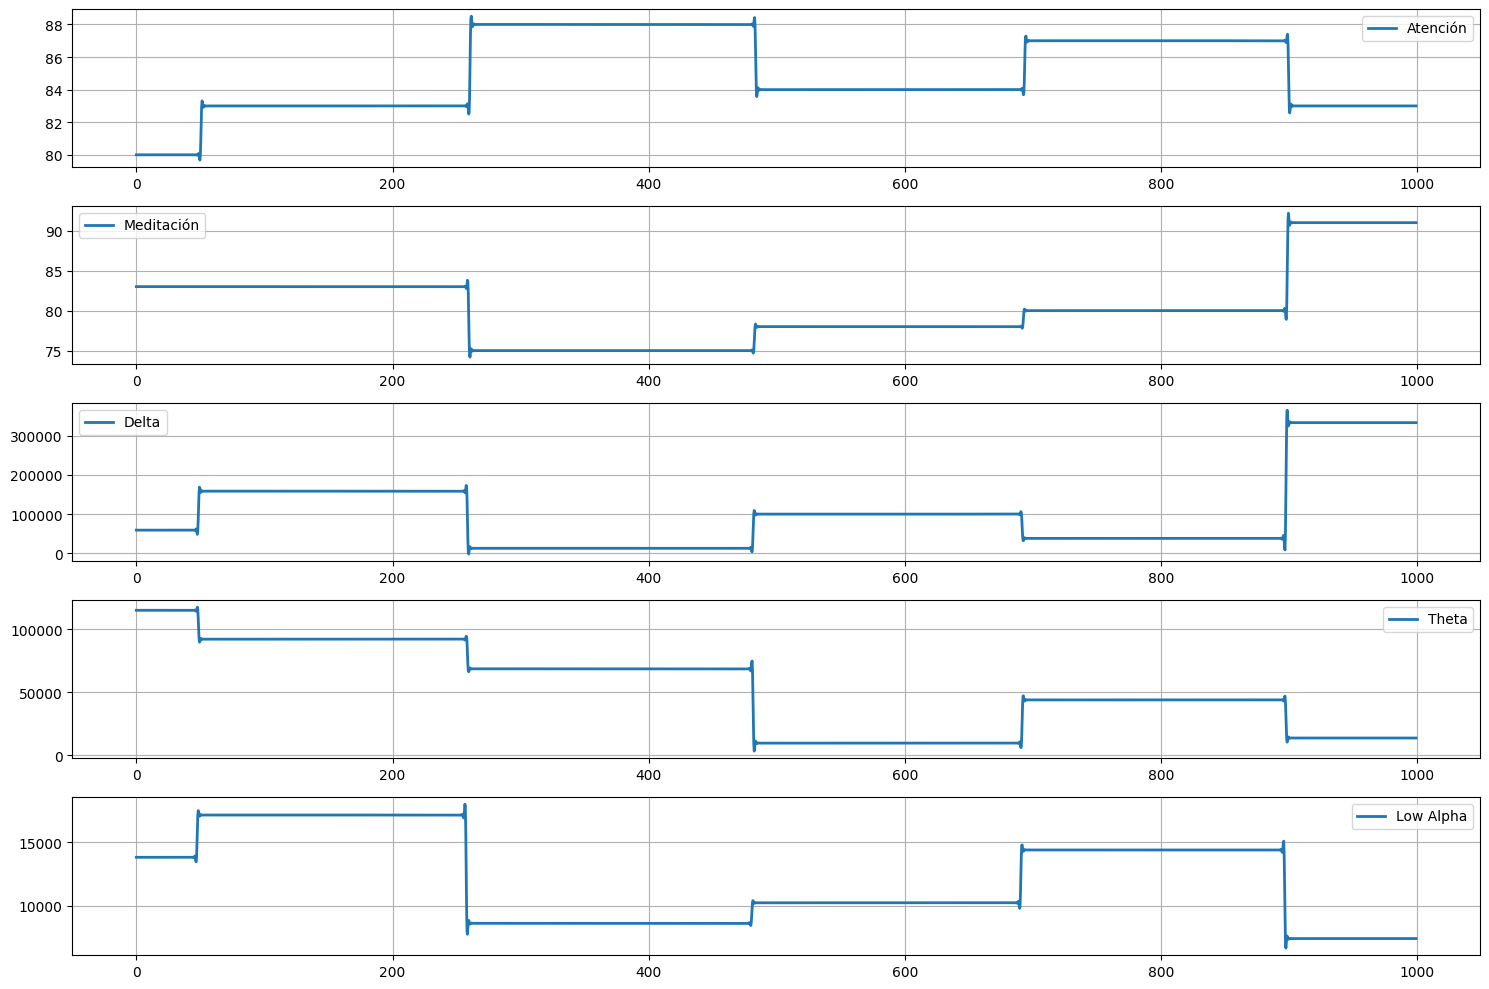

AttributeError: 'Headset' object has no attribute 'disconnect'

In [8]:
import mindwave
import time
import collections
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np
import threading
import queue
from scipy.interpolate import interp1d

class EEGDataCollector:
    def __init__(self, port='COM3', max_points=1000):
        self.port = port
        self.max_points = max_points
        self.headset = None
        self.data_queue = queue.Queue()
        self.stop_event = threading.Event()
        
        self.data = {
            'attention': collections.deque(maxlen=max_points),
            'meditation': collections.deque(maxlen=max_points),
            'raw': collections.deque(maxlen=max_points),
            'delta': collections.deque(maxlen=max_points),
            'theta': collections.deque(maxlen=max_points),
            'low_alpha': collections.deque(maxlen=max_points)
        }

    def connect_headset(self):
        try:
            print('Conectando a Mindwave...')
            self.headset = mindwave.Headset(self.port)
            time.sleep(2)
            print('Conectado exitosamente')
            return True
        except Exception as e:
            print(f"Error de conexión: {e}")
            return False

    def data_capture_thread(self, sampling_rate):
        sampling_interval = 1 / sampling_rate
        
        while not self.stop_event.is_set():
            try:
                data_point = {
                    'attention': self.headset.attention,
                    'meditation': self.headset.meditation,
                    'raw': self.headset.raw_value,
                    'waves': self.headset.waves
                }
                self.data_queue.put(data_point)
                time.sleep(sampling_interval)
            except Exception as e:
                print(f"Error en captura de datos: {e}")
                break

    def process_data_thread(self):
        while not self.stop_event.is_set():
            try:
                data_point = self.data_queue.get(timeout=1)
                self.data['attention'].append(data_point['attention'])
                self.data['meditation'].append(data_point['meditation'])
                self.data['raw'].append(data_point['raw'])
                self.data['delta'].append(data_point['waves'].get('delta', 0))
                self.data['theta'].append(data_point['waves'].get('theta', 0))
                self.data['low_alpha'].append(data_point['waves'].get('low-alpha', 0))
            except queue.Empty:
                if self.stop_event.is_set():
                    break

    def smooth_signal(self, y):
        if len(y) < 10:
            return y
        x = np.linspace(0, len(y)-1, num=len(y))
        f = interp1d(x, y, kind='cubic')
        x_new = np.linspace(0, len(y)-1, num=len(y) * 3)
        return x_new, f(x_new)

    def live_plot(self):
        clear_output(wait=True)
        plt.figure(figsize=(15, 10))
        
        signals = ['attention', 'meditation', 'delta', 'theta', 'low_alpha']
        titles = ['Atención', 'Meditación', 'Delta', 'Theta', 'Low Alpha']
        
        for i, signal in enumerate(signals, 1):
            plt.subplot(5, 1, i)
            data_list = list(self.data[signal])
            if len(data_list) > 10:
                x_smooth, y_smooth = self.smooth_signal(data_list)
                plt.plot(x_smooth, y_smooth, label=titles[i-1], linewidth=2)
            else:
                plt.plot(data_list, label=titles[i-1], linewidth=2)
            plt.legend()
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def real_time_eeg_capture(self, duration=60, sampling_rate=512):
        if not self.connect_headset():
            return
        
        try:
            capture_thread = threading.Thread(target=self.data_capture_thread, args=(sampling_rate,))
            process_thread = threading.Thread(target=self.process_data_thread)
            
            capture_thread.start()
            process_thread.start()
            
            start_time = time.time()
            
            while time.time() - start_time < duration:
                self.live_plot()
                time.sleep(0.5)
                if not capture_thread.is_alive() or not process_thread.is_alive():
                    break
        except KeyboardInterrupt:
            print("Captura detenida por el usuario")
        finally:
            self.stop_event.set()
            capture_thread.join()
            process_thread.join()
            if self.headset:
                self.headset.disconnect()
            print("Captura finalizada.")

# Uso
collector = EEGDataCollector()
collector.real_time_eeg_capture(duration=60, sampling_rate=256)
